# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab_sex = (pd.crosstab(index=df['sex'], 
                       columns=df['flag_doente'], 
                       margins=True, 
                       margins_name='total')
             .rename(index={0:'female', 1:'male'}, columns={0:'healthy', 1:'sick'}))

tab_sex['mean_healthy'] = tab_sex['healthy'] / tab_sex['total']
tab_sex['mean_sick'] = tab_sex['sick'] / tab_sex['total']

tab_sex['odds'] = tab_sex['sick'] / tab_sex['healthy']
tab_sex['odds_ratio'] = tab_sex['odds'] / tab_sex.loc['total', 'odds']

tab_sex['logito'] = np.log(tab_sex['odds'])
tab_sex['WOE'] = np.log(tab_sex['odds'] / tab_sex.loc['total', 'odds'])

tab_sex

flag_doente,healthy,sick,total,mean_healthy,mean_sick,odds,odds_ratio,logito,WOE
sex,,,,,,,,,
female,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790,-0.892398
male,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410,0.379802
total,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
# Garantir que a coluna 'age' seja numérica e lidar com valores ausentes
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'].dropna(inplace=True)

# Criação da tabela tab_age
tab_age = (pd.crosstab(index=df['age'], 
                       columns=df['flag_doente'], 
                       margins=True, 
                       margins_name='total')
             .rename(columns={0: 'healthy', 
                              1: 'sick'})
             .groupby(by=pd.qcut(df['age'], q=5))  # Agrupamento por 'qcut' corrigido
             .agg('sum'))  # A agregação 'sum' é realizada sobre cada grupo

# Concatenar a soma total
tab_age = pd.concat([tab_age, 
                     pd.DataFrame(data=tab_age.sum(axis=0), columns=['total']).T])

tab_age.index.name = 'age'

# Calcular médias
tab_age['mean_healthy'] = tab_age['healthy'] / tab_age['total']
tab_age['mean_sick'] = tab_age['sick'] / tab_age['total']

# Calcular odds e odds_ratio
tab_age['odds'] = tab_age['sick'] / tab_age['healthy']
tab_age['odds_ratio'] = tab_age['odds'] / tab_age.loc['total', 'odds']

# Calcular logito e WOE
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds'] / tab_age.loc['total', 'odds'])

# Calcular a média da idade para cada faixa etária
tab_age['mean_age'] = df.groupby(by=pd.qcut(df['age'], q=5))['age'].mean()

# Adicionar a média total
tab_age.loc['total', 'mean_age'] = df['age'].mean()

# Arredondar as idades médias
tab_age['mean_age'] = round(tab_age['mean_age'])

# Exibir a tabela final
tab_age

C:\Users\Paulo Roberto\AppData\Local\Temp\ipykernel_15268\3302930895.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(by=pd.qcut(df['age'], q=5))  # Agrupamento por 'qcut' corrigido
C:\Users\Paulo Roberto\AppData\Local\Temp\ipykernel_15268\3302930895.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tab_age['mean_age'] = df.groupby(by=pd.qcut(df['age'], q=5))['age'].mean()


flag_doente,healthy,sick,total,mean_healthy,mean_sick,odds,odds_ratio,logito,WOE,mean_age
age,,,,,,,,,,
"(28.999, 45.0]",41,22,63,0.650794,0.349206,0.536585,0.633094,-0.622530,-0.457137,41.0
"(45.0, 53.0]",26,40,66,0.393939,0.606061,1.538462,1.815163,0.430783,0.596175,50.0
"(53.0, 58.0]",35,43,78,0.448718,0.551282,1.228571,1.449538,0.205852,0.371245,56.0
"(58.0, 62.0]",37,22,59,0.627119,0.372881,0.594595,0.701536,-0.519875,-0.354483,60.0
"(62.0, 77.0]",25,12,37,0.675676,0.324324,0.480000,0.566331,-0.733969,-0.568577,67.0
total,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000,54.0


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

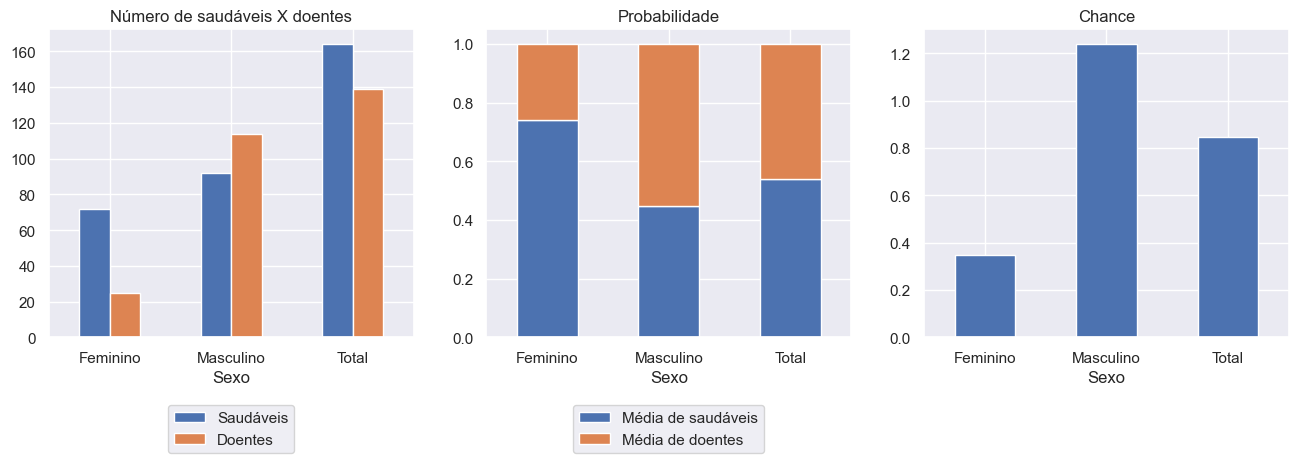

In [6]:
sns.set_theme()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax0 = tab_sex[['healthy', 'sick']].plot.bar(ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')
ax0.set_xlabel(xlabel='Sexo')
ax0.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)
ax0.legend(labels=['Saudáveis', 'Doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax1 = tab_sex[['mean_healthy', 'mean_sick']].plot.bar(ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')
ax1.set_xlabel(xlabel='Sexo')
ax1.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)
ax1.legend(labels=['Média de saudáveis', 'Média de doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax2 = tab_sex['odds'].plot.bar(ax=axes[2])
ax2.set_title(label='Chance')
ax2.set_xlabel(xlabel='Sexo')
ax2.set_xticklabels(labels=['Feminino', 'Masculino', 'Total'], rotation=0)

plt.show()

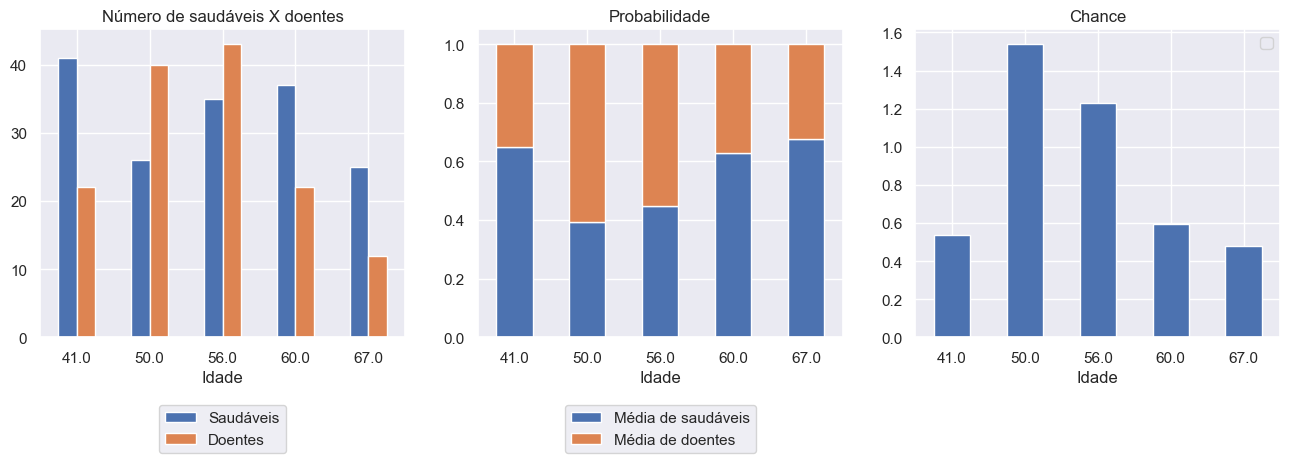

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

ax0 = tab_age.iloc[:-1,].plot.bar(x='mean_age', y=['healthy', 'sick'], ax=axes[0])
ax0.set_title(label='Número de saudáveis X doentes')
ax0.set_xlabel(xlabel='Idade')
ax0.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)
ax0.legend(labels=['Saudáveis', 'Doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax1 = tab_age.iloc[:-1].plot.bar(y=['mean_healthy', 'mean_sick'], ax=axes[1], stacked=True)
ax1.set_title(label='Probabilidade')
ax1.set_xlabel(xlabel='Idade')
ax1.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)
ax1.legend(labels=['Média de saudáveis', 'Média de doentes'], loc=8, bbox_to_anchor=(0.5, -.4))

ax2 = tab_age.iloc[:-1].plot.bar(y='odds', ax=axes[2])
ax2.set_title(label='Chance')
ax2.set_xlabel(xlabel='Idade')
ax2.set_xticklabels(labels=ax0.get_xticklabels(), rotation=0)
ax2.legend(labels='')

plt.show()

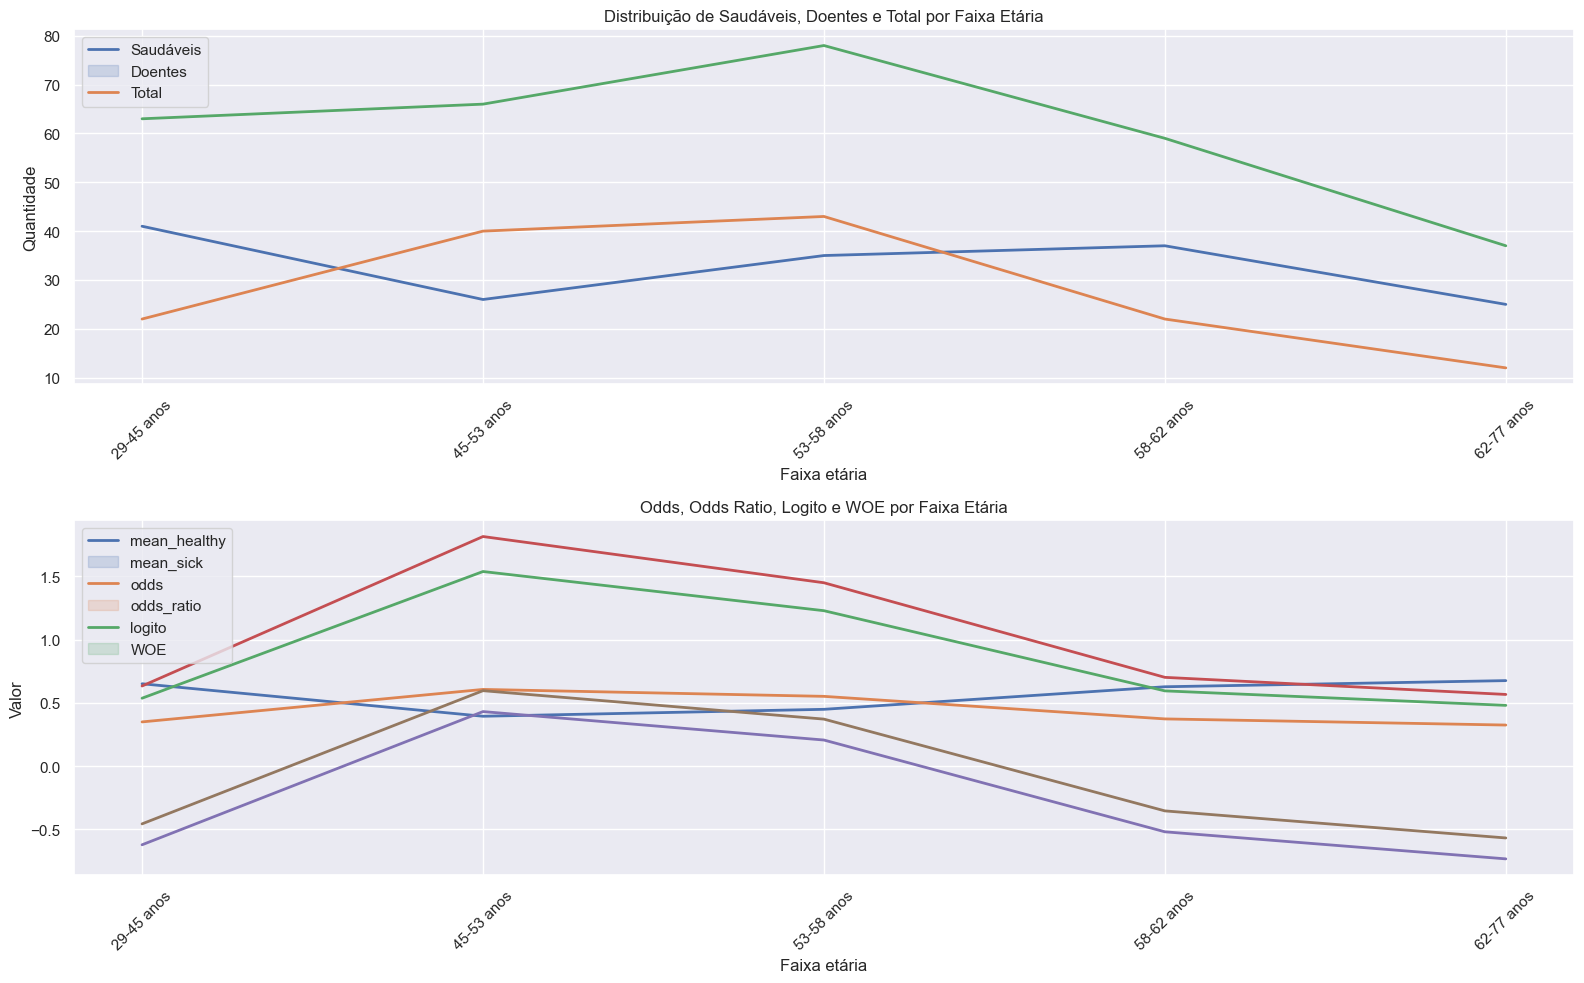

In [8]:
# Criando os subgráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

age_labels = ['29-45 anos', '45-53 anos', '53-58 anos', '58-62 anos', '62-77 anos']

# Primeira parte do gráfico (Saudáveis, Doentes e Total)
for col in tab_age.iloc[:-1, :3]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str), 
                 y=tab_age.iloc[:-1][col], 
                 ax=axes[0], 
                 linewidth=2)
axes[0].legend(labels=['Saudáveis', 'Doentes', 'Total'], loc='upper left')
axes[0].set_title('Distribuição de Saudáveis, Doentes e Total por Faixa Etária')
axes[0].set_xlabel('Faixa etária')
axes[0].set_ylabel('Quantidade')
axes[0].set_xticks(range(len(age_labels)))
axes[0].set_xticklabels(age_labels, rotation=45)

# Segunda parte do gráfico (Odds, Odds Ratio, Logito e WOE)
for col in tab_age.iloc[:-1, 3:-1]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str), 
                 y=tab_age.iloc[:-1][col], 
                 ax=axes[1], 
                 linewidth=2)
axes[1].legend(labels=tab_age.iloc[:-1, 3:-1].columns, loc='upper left')
axes[1].set_title('Odds, Odds Ratio, Logito e WOE por Faixa Etária')
axes[1].set_xlabel('Faixa etária')
axes[1].set_ylabel('Valor')
axes[1].set_xticks(range(len(age_labels)))
axes[1].set_xticklabels(age_labels, rotation=45)

# Ajuste de layout para evitar sobreposição
plt.tight_layout()
plt.show()